<h1> Load Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.style.use('seaborn')
from matplotlib import pyplot as plt


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



<h1> Load the data

In [2]:
# Load the data from the csv files

train_data = pd.read_csv("preprocessed_train_3.csv", index_col="index")
test_data = pd.read_csv("preprocessed_test_3.csv", index_col="index") 

In [3]:
target = "change_type"
X = train_data.drop(columns = target)
Y = train_data[target].map({'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5})

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True)

<h1> 5 Models for 1 Prediction : 1 vs All

<h2> Dataset 1 : 50% vs 5x10%

*Description :* Resample with 50% of the targeted class and 10 % of each other ones

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def new_sampling(X, y, strategy):
    """ 
    Returns a new dataset (X, y) with the desired sampling.
    Strategy (dic) : keys(int) = label of the class to resample - values(int) = data length for this label
    """
    strat_under = {}

    for cat, nb in strategy.items():
        if nb < np.unique(y, return_counts=True)[1][cat]:
            strat_under[cat] = nb
        else : 
            strat_under[cat] = np.unique(y, return_counts=True)[1][cat]
    X, y = RandomUnderSampler(sampling_strategy=strat_under).fit_resample(X, y)
    X, y = RandomOverSampler(sampling_strategy=strategy).fit_resample(X, y)

    return X, y

In [ ]:
n = y_train.value_counts()
n

In [9]:
k = n[0]*4
strategy = {0 : k, 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

X_train0, y_train0 = new_sampling(X_train, y_train, strategy)
y_train0 = y_train0.apply(lambda x : 1 if x == 0 else 0)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (88880) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22220)
  warnings.warn(


In [10]:
k = n[1]*7
strategy = {0 : int(k/5), 1 : k, 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

X_train1, y_train1 = new_sampling(X_train, y_train, strategy)
y_train1 = y_train1.apply(lambda x : 1 if x == 1 else 0)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (78057) in class 1 will be larger than the number of samples in the majority class (class #0 -> 15611)
  warnings.warn(


In [11]:
k = n[2]//2
strategy = {0 : int(k/5), 1 : int(k/5), 2 : k, 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

X_train2, y_train2 = new_sampling(X_train, y_train, strategy)
y_train2 = y_train2.apply(lambda x : 1 if x == 2 else 0)


In [12]:
k = n[3]
strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : k, 4 : int(k/5), 5 : int(k/5)}

X_train3, y_train3 = new_sampling(X_train, y_train, strategy)
y_train3 = y_train3.apply(lambda x : 1 if x == 3 else 0)


In [13]:
k = n[4]*15
strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : k, 5 : int(k/5)}
X_train4, y_train4 = new_sampling(X_train, y_train, strategy)
y_train4 = y_train4.apply(lambda x : 1 if x == 4 else 0)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (17220) in class 4 will be larger than the number of samples in the majority class (class #0 -> 3444)
  warnings.warn(


In [14]:
k = n[5]*30
strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : k}

X_train5, y_train5 = new_sampling(X_train, y_train, strategy)
y_train5 = y_train5.apply(lambda x : 1 if x == 5 else 0)


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (2850) in class 5 will be larger than the number of samples in the majority class (class #0 -> 570)
  warnings.warn(


<h2> Model 1 : Random Forests

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf0 = RandomForestClassifier().fit(X_train0, y_train0)
clf1 = RandomForestClassifier().fit(X_train1, y_train1)
clf2 = RandomForestClassifier().fit(X_train2, y_train2)
clf3 = RandomForestClassifier().fit(X_train3, y_train3)
clf4 = RandomForestClassifier().fit(X_train4, y_train4)
clf5 = RandomForestClassifier().fit(X_train5, y_train5)

In [43]:
y_pred = clf0.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==0 else 0)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98     70130
           1       0.70      0.95      0.81      7372

    accuracy                           0.96     77502
   macro avg       0.85      0.95      0.89     77502
weighted avg       0.97      0.96      0.96     77502



In [44]:
y_pred = clf1.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==1 else 0)))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97     73726
           1       0.41      0.78      0.54      3776

    accuracy                           0.94     77502
   macro avg       0.70      0.86      0.75     77502
weighted avg       0.96      0.94      0.94     77502



In [45]:
y_pred = clf2.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==2 else 0)))

              precision    recall  f1-score   support

           0       0.82      0.59      0.68     36385
           1       0.71      0.88      0.79     41117

    accuracy                           0.74     77502
   macro avg       0.76      0.73      0.73     77502
weighted avg       0.76      0.74      0.74     77502



In [46]:
y_pred = clf3.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==3 else 0)))

              precision    recall  f1-score   support

           0       0.91      0.49      0.64     52672
           1       0.46      0.90      0.61     24830

    accuracy                           0.62     77502
   macro avg       0.68      0.70      0.62     77502
weighted avg       0.77      0.62      0.63     77502



In [47]:
y_pred = clf4.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==4 else 0)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     77123
           1       0.09      0.44      0.15       379

    accuracy                           0.98     77502
   macro avg       0.54      0.71      0.57     77502
weighted avg       0.99      0.98      0.98     77502



In [48]:
y_pred = clf5.predict(X_test)

print(classification_report(y_pred=y_pred, y_true=y_test.apply(lambda x : 1 if x==5 else 0)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77474
           1       0.02      0.14      0.04        28

    accuracy                           1.00     77502
   macro avg       0.51      0.57      0.52     77502
weighted avg       1.00      1.00      1.00     77502



In [58]:
y_pred = np.array([clf0.predict_proba(X_test)[:, 1], clf1.predict_proba(X_test)[:, 1], clf2.predict_proba(X_test)[:, 1], clf3.predict_proba(X_test)[:, 1], clf4.predict_proba(X_test)[:, 1], clf5.predict_proba(X_test)[:, 1]])
y_pred

array([[0.  , 0.01, 0.02, ..., 0.1 , 0.  , 0.01],
       [0.07, 0.02, 0.02, ..., 0.17, 0.12, 0.  ],
       [0.93, 0.99, 0.98, ..., 0.86, 0.9 , 0.35],
       [0.47, 0.42, 0.43, ..., 0.49, 0.65, 1.  ],
       [0.19, 0.02, 0.  , ..., 0.05, 0.02, 0.02],
       [0.09, 0.01, 0.  , ..., 0.04, 0.04, 0.03]])

In [63]:
y_pred = y_pred.argmax(axis = 0)

print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      7372
           1       0.57      0.67      0.62      3776
           2       0.84      0.71      0.77     41117
           3       0.61      0.69      0.65     24830
           4       0.15      0.28      0.19       379
           5       0.10      0.14      0.12        28

    accuracy                           0.72     77502
   macro avg       0.50      0.57      0.53     77502
weighted avg       0.74      0.72      0.72     77502



In [72]:
confusion_matrix(y_test, y_pred)

array([[ 6895,    55,    91,   324,     7,     0],
       [   27,  2531,   224,   981,    13,     0],
       [ 1629,   589, 29030,  9630,   216,    23],
       [  843,  1222,  5251, 17125,   379,    10],
       [   12,    15,    90,   155,   105,     2],
       [    1,     1,     9,    13,     0,     4]], dtype=int64)

In [ ]:
# For submission

y_pred_final = np.array([clf0.predict_proba(test_data)[:, 1], clf1.predict_proba(test_data)[:, 1], clf2.predict_proba(test_data)[:, 1], clf3.predict_proba(test_data)[:, 1], clf4.predict_proba(test_data)[:, 1], clf5.predict_proba(test_data)[:, 1]])
y_pred_final = y_pred_final.argmax(axis = 0)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("first_sample_submission.csv", index=True, index_label='Id')

<h2> Model 2 : LightGBMs

In [ ]:
from lightgbm import LGBMClassifier

clf0 = LGBMClassifier().fit(X_train0, y_train0)
clf1 = LGBMClassifier().fit(X_train1, y_train1)
clf2 = LGBMClassifier().fit(X_train2, y_train2)
clf3 = LGBMClassifier().fit(X_train3, y_train3)
clf4 = LGBMClassifier().fit(X_train4, y_train4)
clf5 = LGBMClassifier().fit(X_train5, y_train5)

In [29]:
y_pred = np.array([clf0.predict_proba(X_test)[:, 1], clf1.predict_proba(X_test)[:, 1], clf2.predict_proba(X_test)[:, 1], clf3.predict_proba(X_test)[:, 1], clf4.predict_proba(X_test)[:, 1], clf5.predict_proba(X_test)[:, 1]])
y_pred = y_pred.argmax(axis = 0)

print(classification_report(y_pred=y_pred, y_true=y_test))
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      7518
           1       0.52      0.83      0.64      3869
           2       0.85      0.70      0.77     40890
           3       0.62      0.64      0.63     24802
           4       0.09      0.51      0.16       384
           5       0.01      0.10      0.02        39

    accuracy                           0.71     77502
   macro avg       0.47      0.62      0.51     77502
weighted avg       0.75      0.71      0.72     77502



array([[ 7094,    58,    72,   263,    24,     7],
       [   19,  3206,   136,   466,    36,     6],
       [ 1614,   959, 28655,  8834,   682,   146],
       [  870,  1917,  4769, 15971,  1135,   140],
       [    8,    18,    74,    82,   196,     6],
       [    1,     3,    14,    10,     7,     4]], dtype=int64)

In [32]:
# For submission

y_pred_final = np.array([clf0.predict_proba(test_data)[:, 1], clf1.predict_proba(test_data)[:, 1], clf2.predict_proba(test_data)[:, 1], clf3.predict_proba(test_data)[:, 1], clf4.predict_proba(test_data)[:, 1], clf5.predict_proba(test_data)[:, 1]])
y_pred_final = y_pred_final.argmax(axis = 0)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("second_sample_submission.csv", index=True, index_label='Id')

<h2> Data 2 : 50% - 50 %

*Description :* This time, we keep the same distribution on the non-targeted class and 50% of the total training set for the targeted class

In [22]:
k = n[0]*4

y_train0 = y_train.apply(lambda x : 1 if x == 0 else 0)
strategy = {0 : k, 1 : k}

X_train0, y_train0 = new_sampling(X_train, y_train0, strategy)


In [23]:
k = n[1]*7

y_train1 = y_train.apply(lambda x : 1 if x == 1 else 0)
strategy = {0 : k, 1 : k}

X_train1, y_train1 = new_sampling(X_train, y_train1, strategy)


In [24]:
k = n[2]//2

y_train2 = y_train.apply(lambda x : 1 if x == 2 else 0)
strategy = {0 : k, 1 : k}

X_train2, y_train2 = new_sampling(X_train, y_train2, strategy)


In [25]:
k = n[3]

y_train3 = y_train.apply(lambda x : 1 if x == 3 else 0)
strategy = {0 : k, 1 : k}

X_train3, y_train3 = new_sampling(X_train, y_train3, strategy)


In [26]:
k = n[4]*15

y_train4 = y_train.apply(lambda x : 1 if x == 4 else 0)
strategy = {0 : k, 1 : k}

X_train4, y_train4 = new_sampling(X_train, y_train4, strategy)


In [27]:
k = n[5]*30

y_train5 = y_train.apply(lambda x : 1 if x == 5 else 0)
strategy = {0 : k, 1 : k}

X_train5, y_train5 = new_sampling(X_train, y_train5, strategy)


<h2> Model 3 : XGBoosts

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf0 = GradientBoostingClassifier().fit(X_train0, y_train0)
clf1 = GradientBoostingClassifier().fit(X_train1, y_train1)
clf2 = GradientBoostingClassifier().fit(X_train2, y_train2)
clf3 = GradientBoostingClassifier().fit(X_train3, y_train3)
clf4 = GradientBoostingClassifier().fit(X_train4, y_train4)
clf5 = GradientBoostingClassifier().fit(X_train5, y_train5)

              precision    recall  f1-score   support

           0       0.74      0.94      0.83      7518
           1       0.42      0.80      0.55      3869
           2       0.81      0.68      0.74     40890
           3       0.58      0.51      0.54     24802
           4       0.07      0.45      0.13       384
           5       0.00      0.23      0.01        39

    accuracy                           0.66     77502
   macro avg       0.44      0.60      0.47     77502
weighted avg       0.71      0.66      0.67     77502

[[ 7065    57    83   234    33    46]
 [   16  3077   235   477    35    29]
 [ 1630  1237 27788  8291   911  1033]
 [  872  2919  6184 12663  1228   936]
 [    9    28    96    61   173    17]
 [    1     3    15     8     3     9]]


<AxesSubplot:>

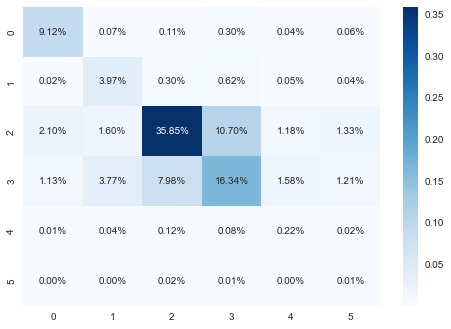

In [37]:
y_pred = np.array([clf0.predict_proba(X_test)[:, 1], clf1.predict_proba(X_test)[:, 1], clf2.predict_proba(X_test)[:, 1], clf3.predict_proba(X_test)[:, 1], clf4.predict_proba(X_test)[:, 1], clf5.predict_proba(X_test)[:, 1]])
y_pred = y_pred.argmax(axis = 0)

print(classification_report(y_pred=y_pred, y_true=y_test))
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, fmt = '.2%', cmap = 'Blues')

<h2> Short summary for the moment

No matter how we created the data, and the model, it seems that there are big confusions: 
- class 2 is predicted as class 0
- between class 2 and 3
- class 5 has really big troubles ==> especially class 5 often predicted as class 2 and 3
- class 3 predicted as class 1
- class 4 often predicted as class 2 and 3

<h1> Giga Classifier : The one to gather everyone

In [7]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


class GigaClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, **params):
        self.params = params

        if "param_class0" in params.keys():
            self.clf0 = LGBMClassifier(**params["param_class0"])
        else :
            self.clf0 = LGBMClassifier()
        
        if "param_class1" in params.keys():
            self.clf1 = LGBMClassifier(**params["param_class1"])
        else :
            self.clf1 = LGBMClassifier()

        if "param_class2" in params.keys():
            self.clf2 = LGBMClassifier(**params["param_class2"])
        else :
            self.clf2 = LGBMClassifier()

        if "param_class3" in params.keys():
            self.clf3 = LGBMClassifier(**params["param_class3"])
        else :
            self.clf3 = LGBMClassifier()

        if "param_class4" in params.keys():
            self.clf4 = LGBMClassifier(**params["param_class4"])
        else :
            self.clf4 = LGBMClassifier()

        if "param_class5" in params.keys():
            self.clf5 = LGBMClassifier(**params["param_class5"])
        else :
            self.clf5 = LGBMClassifier()

        if "param_class23" in params.keys():
            self.clf23 = XGBClassifier(**params["param_class23"])
        else :
            self.clf23 = XGBClassifier()

        if "param_class02" in params.keys():
            self.clf02 = XGBClassifier(**params["param_class02"])
        else:
            self.clf02 = XGBClassifier()

        if "param_class_final" in params.keys():
            self.clf_final = LogisticRegression(**params["param_class_final"])
        else :
            self.clf_final = LogisticRegression()

    def fit(self, X, y):
        X, _ = check_X_y(X, y)
        
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
    
        _, n = np.unique(self.y_, return_counts=True)
        
        # Classifier 0

        if "strategy0" in self.params.keys():
            strategy = self.params["strategy0"]
            print('ok')
        else :
            k = n[0]*4
            strategy = {0 : k, 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train0, y_train0 = new_sampling(self.X_, self.y_, strategy)
        y_train0 = y_train0.apply(lambda x : 1 if x == 0 else 0)

        self.clf0 = self.clf0.fit(X_train0, y_train0)

        del X_train0
        del y_train0

        # Classifier 1
        if "strategy1" in self.params.keys():
            strategy = self.params["strategy1"]
        else :
            k = n[1]*7
            strategy = {0 : int(k/5), 1 : k, 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train1, y_train1 = new_sampling(self.X_, self.y_, strategy)
        y_train1 = y_train1.apply(lambda x : 1 if x == 1 else 0)

        self.clf1 = self.clf1.fit(X_train1, y_train1)

        del X_train1
        del y_train1
        
        # Classifier 2

        if "strategy2" in self.params.keys():
            strategy = self.params["strategy2"]
        else :
            k = n[2]//2
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : k, 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train2, y_train2 = new_sampling(self.X_, self.y_, strategy)
        y_train2 = y_train2.apply(lambda x : 1 if x == 2 else 0)

        self.clf2 = self.clf2.fit(X_train2, y_train2)

        del X_train2
        del y_train2
        
        # Classifier 3
        if "strategy3" in self.params.keys():
            strategy = self.params["strategy3"]
        else :
            k = n[3]
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : k, 4 : int(k/5), 5 : int(k/5)}

        X_train3, y_train3 = new_sampling(self.X_, self.y_, strategy)
        y_train3 = y_train3.apply(lambda x : 1 if x == 3 else 0)

        self.clf3 = self.clf3.fit(X_train3, y_train3)

        del X_train3
        del y_train3
        
        # Classifier 4
        if "strategy4" in self.params.keys():
            strategy = self.params["strategy4"]
        else :
            k = n[4]*15
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : k, 5 : int(k/5)}
        X_train4, y_train4 = new_sampling(self.X_, self.y_, strategy)
        y_train4 = y_train4.apply(lambda x : 1 if x == 4 else 0)

        self.clf4 = self.clf4.fit(X_train4, y_train4)

        del X_train4
        del y_train4
        
        # Classifier 5
        if "strategy5" in self.params.keys():
            strategy = self.params["strategy5"]
        else :
            k = n[5]*30
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : k}

        X_train5, y_train5 = new_sampling(self.X_, self.y_, strategy)
        y_train5 = y_train5.apply(lambda x : 1 if x == 5 else 0)

        self.clf5 = self.clf5.fit(X_train5, y_train5)

        del X_train5
        del y_train5

        # Classifier 2-3

        mask = (self.y_ >= 2)&(self.y_ <= 3)
        X_train_23 = self.X_[mask]
        y_train_23 = self.y_[mask].apply(lambda x : 0 if x == 2 else 1)

        self.clf23.fit(X_train_23, y_train_23)

        del X_train_23
        del y_train_23

        # Classifier 0-2

        mask = (self.y_ == 0) | (self.y_ == 2)
        X_train_02 = self.X_[mask]
        y_train_02 = self.y_[mask].apply(lambda x : 1 if x == 2 else 0)

        self.clf02.fit(X_train_02, y_train_02)

        del X_train_02
        del y_train_02


        # # Final classifier

        self.clf_final.fit(np.array([self.clf0.predict_proba(self.X_)[:, 1], self.clf1.predict_proba(self.X_)[:, 1], self.clf2.predict_proba(self.X_)[:, 1], self.clf3.predict_proba(self.X_)[:, 1], self.clf4.predict_proba(self.X_)[:, 1], self.clf5.predict_proba(self.X_)[:, 1], self.clf23.predict_proba(self.X_)[:, 1], self.clf02.predict_proba(self.X_)[:, 1]]).T, self.y_)

        return self

    def predict(self, X):

        check_is_fitted(self)
        X = check_array(X)

        y_pred = self.clf_final.predict(np.array([self.clf0.predict_proba(X)[:, 1], self.clf1.predict_proba(X)[:, 1], self.clf2.predict_proba(X)[:, 1], self.clf3.predict_proba(X)[:, 1], self.clf4.predict_proba(X)[:, 1], self.clf5.predict_proba(X)[:, 1], self.clf23.predict_proba(X)[:, 1], self.clf02.predict_proba(X)[:, 1]]).T)

        return y_pred

In [16]:
# Parameters get from a previous optimization thanks to Optuna

params0 = {
    'lambda_l1': 2.6872862643862735e-08,
    'lambda_l2': 8.847210865496761e-05,
    'num_leaves': 237,
    'feature_fraction': 0.7288052849027135,
    'bagging_fraction': 0.9025709095367934,
    'bagging_freq': 7,
    'min_child_samples': 77,
}
params1 = {
    'lambda_l1': 0.0013705932580895786,
    'lambda_l2': 6.485565825375892e-05,
    'num_leaves': 199,
    'feature_fraction': 0.42236304060424307,
    'bagging_fraction': 0.42044813181578355,
    'bagging_freq': 4,
    'min_child_samples': 73,
}
params2 = {
    'lambda_l1': 7.090585986849676e-06,
    'lambda_l2': 7.521772589331394e-08,
    'num_leaves': 14,
    'feature_fraction': 0.8513991837274677,
    'bagging_fraction': 0.4645029881904542,
    'bagging_freq': 4,
    'min_child_samples': 98,
}
params3 = {
    'lambda_l1': 1.848701043798064e-06,
    'lambda_l2': 0.043335587582062476,
    'num_leaves': 215,
    'feature_fraction': 0.41783624352315224,
    'bagging_fraction': 0.724036321056638,
    'bagging_freq': 3,
    'min_child_samples': 84,
}
params4 = {
    'lambda_l1': 0.0002019912962750637,
    'lambda_l2': 0.19888075677942632,
    'num_leaves': 244,
    'feature_fraction': 0.5575766302690415,
    'bagging_fraction': 0.6140142495655897,
    'bagging_freq': 2,
    'min_child_samples': 100,
}
params5 = {
    'lambda_l1': 0.1270358418163837,
    'lambda_l2': 4.074402658219765,
    'num_leaves': 113,
    'feature_fraction': 0.8540798565061588,
    'bagging_fraction': 0.5738767562757935,
    'bagging_freq': 2,
    'min_child_samples': 8,
}
params23 = {
    "booster": "dart",
    "lambda": 0.006277280353771211,
    "alpha": 0.6608034452167744,
    "subsample": 0.6368237400610851,
    "colsample_bytree": 0.5584744160503385,
    "max_depth": 9,
    "min_child_weight": 3,
    "eta": 1.7237157929124854e-05,
    "gamma": 0.08742989220484203,
    "grow_policy": "lossguide",
    "sample_type": "weighted",
    "normalize_type": "forest",
    "rate_drop": 1.7562797525285437e-06,
    "skip_drop": 0.033132988184049916

}

params02 = {
    "booster": "gbtree",
    "lambda": 9.346555270960027e-07,
    "alpha": 0.0018635542832431587,
    "subsample": 0.4596472873670543,
    "colsample_bytree": 0.5562039596158961,
    "max_depth": 9,
    "min_child_weight": 4,
    "eta": 5.226320955440263e-07,
    "gamma": 1.8305443146986327e-06,
    "grow_policy": "lossguide"
}

In [17]:
model = GigaClassifier(param_class0 = params0, param_class1 = params1, param_class2 = params2,
                       param_class3 = params3, param_class4 = params4, param_class5 = params5,
                       param_class23 = params23, param_class02 = params02)
model = model.fit(X_train, y_train)

C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (88844) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22211)
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.7288052849027135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7288052849027135
[LightGBM] [Warning] lambda_l1 is set=2.6872862643862735e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.6872862643862735e-08
[LightGBM] [Warning] bagging_fraction is set=0.9025709095367934, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9025709095367934
[LightGBM] [Warning] lambda_l2 is set=8.847210865496761e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.847210865496761e-05
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8678
           1       0.72      0.74      0.73      3607
           2       0.81      0.79      0.80     41499
           3       0.64      0.68      0.66     23538
           4       0.12      0.24      0.16       176
           5       0.06      0.50      0.10         4

    accuracy                           0.75     77502
   macro avg       0.54      0.62      0.55     77502
weighted avg       0.76      0.75      0.75     77502

[[ 6591    28  1384   666     8     1]
 [   23  2675   298   603     6     2]
 [  431   299 32981  7643   127    18]
 [  363   715  6239 16026   184    11]
 [    1     1    49    81    43     1]
 [    0     0     1     1     0     2]]


<AxesSubplot:>

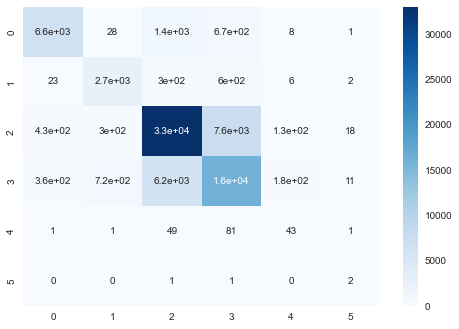

In [ ]:
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
cf_matrix = confusion_matrix(y_pred, y_test)
print(cf_matrix)
sns.heatmap(cf_matrix, annot = True, cmap = 'Blues')

In [14]:
# For submission

y_pred_final = model.predict(test_data)
print(y_pred_final.shape)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("submissions/bao3_sample_submission.csv", index=True, index_label='Id')

(121704,)


<h2> Optimisation with Optuna and sampling strategy as a parameter

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def new_sampling(X, y, strategy):
    strat_under = {}

    for cat, nb in strategy.items():
        if nb < np.unique(y, return_counts=True)[1][cat]:
            strat_under[cat] = nb
        else : 
            strat_under[cat] = np.unique(y, return_counts=True)[1][cat]
    X, y = RandomUnderSampler(sampling_strategy=strat_under).fit_resample(X, y)
    X, y = RandomOverSampler(sampling_strategy=strategy).fit_resample(X, y)

    return X, y

class GigaClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, **params):
        self.params = params

        if "param_class0" in params.keys():
            self.clf0 = LGBMClassifier(**params["param_class0"])
        else :
            self.clf0 = LGBMClassifier()
        
        if "param_class1" in params.keys():
            self.clf1 = LGBMClassifier(**params["param_class1"])
        else :
            self.clf1 = LGBMClassifier()

        if "param_class2" in params.keys():
            self.clf2 = LGBMClassifier(**params["param_class2"])
        else :
            self.clf2 = LGBMClassifier()

        if "param_class3" in params.keys():
            self.clf3 = LGBMClassifier(**params["param_class3"])
        else :
            self.clf3 = LGBMClassifier()

        if "param_class4" in params.keys():
            self.clf4 = LGBMClassifier(**params["param_class4"])
        else :
            self.clf4 = LGBMClassifier()

        if "param_class5" in params.keys():
            self.clf5 = LGBMClassifier(**params["param_class5"])
        else :
            self.clf5 = LGBMClassifier()

        if "param_class23" in params.keys():
            self.clf23 = LGBMClassifier(**params["param_class23"])
        else :
            self.clf23 = LGBMClassifier()

        if "param_class02" in params.keys():
            self.clf02 = LGBMClassifier(**params["param_class02"])
        else:
            self.clf02 = LGBMClassifier()

        if "param_class_final" in params.keys():
            self.clf_final = LogisticRegression(**params["param_class_final"])
        else :
            self.clf_final = LogisticRegression()

    def fit(self, X, y):
        X, _ = check_X_y(X, y)
        
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
    
        _, n = np.unique(self.y_, return_counts=True)
        
        # Classifier 0

        if "strategy0" in self.params.keys():
            strategy = self.params["strategy0"]
            print('ok')
        else :
            k = n[0]*4
            strategy = {0 : k, 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train0, y_train0 = new_sampling(self.X_, self.y_, strategy)
        y_train0 = y_train0.apply(lambda x : 1 if x == 0 else 0)

        self.clf0 = self.clf0.fit(X_train0, y_train0)

        del X_train0
        del y_train0

        # Classifier 1
        if "strategy1" in self.params.keys():
            strategy = self.params["strategy1"]
        else :
            k = n[1]*7
            strategy = {0 : int(k/5), 1 : k, 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train1, y_train1 = new_sampling(self.X_, self.y_, strategy)
        y_train1 = y_train1.apply(lambda x : 1 if x == 1 else 0)

        self.clf1 = self.clf1.fit(X_train1, y_train1)

        del X_train1
        del y_train1
        
        # Classifier 2

        if "strategy2" in self.params.keys():
            strategy = self.params["strategy2"]
        else :
            k = n[2]//2
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : k, 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train2, y_train2 = new_sampling(self.X_, self.y_, strategy)
        y_train2 = y_train2.apply(lambda x : 1 if x == 2 else 0)

        self.clf2 = self.clf2.fit(X_train2, y_train2)

        del X_train2
        del y_train2
        
        # Classifier 3
        if "strategy3" in self.params.keys():
            strategy = self.params["strategy3"]
        else :
            k = n[3]
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : k, 4 : int(k/5), 5 : int(k/5)}

        X_train3, y_train3 = new_sampling(self.X_, self.y_, strategy)
        y_train3 = y_train3.apply(lambda x : 1 if x == 3 else 0)

        self.clf3 = self.clf3.fit(X_train3, y_train3)

        del X_train3
        del y_train3
        
        # Classifier 4
        if "strategy4" in self.params.keys():
            strategy = self.params["strategy4"]
        else :
            k = n[4]*15
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : k, 5 : int(k/5)}
        X_train4, y_train4 = new_sampling(self.X_, self.y_, strategy)
        y_train4 = y_train4.apply(lambda x : 1 if x == 4 else 0)

        self.clf4 = self.clf4.fit(X_train4, y_train4)

        del X_train4
        del y_train4
        
        # Classifier 5
        if "strategy5" in self.params.keys():
            strategy = self.params["strategy5"]
        else :
            k = n[5]*30
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : k}

        X_train5, y_train5 = new_sampling(self.X_, self.y_, strategy)
        y_train5 = y_train5.apply(lambda x : 1 if x == 5 else 0)

        self.clf5 = self.clf5.fit(X_train5, y_train5)

        del X_train5
        del y_train5

        # Classifier 2-3

        mask = (self.y_ >= 2)&(self.y_ <= 3)
        X_train_23 = self.X_[mask]
        y_train_23 = self.y_[mask].apply(lambda x : 0 if x == 2 else 1)

        self.clf23.fit(X_train_23, y_train_23)

        del X_train_23
        del y_train_23

        # Classifier 0-2

        mask = (self.y_ == 0) | (self.y_ == 2)
        X_train_02 = self.X_[mask]
        y_train_02 = self.y_[mask].apply(lambda x : 1 if x == 2 else 0)

        self.clf02.fit(X_train_02, y_train_02)

        del X_train_02
        del y_train_02


        # # Final classifier

        self.clf_final.fit(np.array([self.clf0.predict_proba(self.X_)[:, 1], self.clf1.predict_proba(self.X_)[:, 1], self.clf2.predict_proba(self.X_)[:, 1], self.clf3.predict_proba(self.X_)[:, 1], self.clf4.predict_proba(self.X_)[:, 1], self.clf5.predict_proba(self.X_)[:, 1], self.clf23.predict_proba(self.X_)[:, 1], self.clf02.predict_proba(self.X_)[:, 1]]).T, self.y_)

        return self

    def predict(self, X):

        check_is_fitted(self)
        X = check_array(X)

        y_pred = self.clf_final.predict(np.array([self.clf0.predict_proba(X)[:, 1], self.clf1.predict_proba(X)[:, 1], self.clf2.predict_proba(X)[:, 1], self.clf3.predict_proba(X)[:, 1], self.clf4.predict_proba(X)[:, 1], self.clf5.predict_proba(X)[:, 1], self.clf23.predict_proba(X)[:, 1], self.clf02.predict_proba(X)[:, 1]]).T)

        return y_pred

In [6]:
# Some errors from the computer made some issue with the data.
# It comes from nowhere ...

X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)
test_data = np.nan_to_num(test_data)

<h3> Optimisation of the sampling strategy

In [5]:
from sklearn.metrics import f1_score
import optuna
import lightgbm as lgb

def objective(trial):
    
    dtrain = lgb.Dataset(X_train, label=y_train)


    strategy0 = {
                      0: trial.suggest_int("k_0_0", 100, 70000),
                      1: trial.suggest_int("k_1_0", 100, 70000),
                      2: trial.suggest_int("k_2_0", 100, 70000),
                      3: trial.suggest_int("k_3_0", 100, 70000),
                      4: trial.suggest_int("k_4_0", 100, 70000),
                      5: trial.suggest_int("k_5_0", 100, 15000),


    }

    strategy1 = {
                      0: trial.suggest_int("k_0_1", 100, 70000),
                      1: trial.suggest_int("k_1_1", 100, 70000),
                      2: trial.suggest_int("k_2_1", 100, 70000),
                      3: trial.suggest_int("k_3_1", 100, 70000),
                      4: trial.suggest_int("k_4_1", 100, 70000),
                      5: trial.suggest_int("k_5_1", 100, 15000),

    }

    strategy2 = {
                      0: trial.suggest_int("k_0_2", 100, 70000),
                      1: trial.suggest_int("k_1_2", 100, 70000),
                      2: trial.suggest_int("k_2_2", 100, 70000),
                      3: trial.suggest_int("k_3_2", 100, 70000),
                      4: trial.suggest_int("k_4_2", 100, 70000),
                      5: trial.suggest_int("k_5_2", 100, 15000),

    }

    strategy3 = {
                      0: trial.suggest_int("k_0_3", 100, 70000),
                      1: trial.suggest_int("k_1_3", 100, 70000),
                      2: trial.suggest_int("k_2_3", 100, 70000),
                      3: trial.suggest_int("k_3_3", 100, 70000),
                      4: trial.suggest_int("k_4_3", 100, 70000),
                      5: trial.suggest_int("k_5_3", 100, 15000),

    }

    strategy4 = {
                      0: trial.suggest_int("k_0_4", 100, 70000),
                      1: trial.suggest_int("k_1_4", 100, 70000),
                      2: trial.suggest_int("k_2_4", 100, 70000),
                      3: trial.suggest_int("k_3_4", 100, 70000),
                      4: trial.suggest_int("k_4_4", 100, 70000),
                      5: trial.suggest_int("k_5_4", 100, 15000),

    }

    strategy5 = {
                      0: trial.suggest_int("k_0_5", 100, 70000),
                      1: trial.suggest_int("k_1_5", 100, 70000),
                      2: trial.suggest_int("k_2_5", 100, 70000),
                      3: trial.suggest_int("k_3_5", 100, 70000),
                      4: trial.suggest_int("k_4_5", 100, 70000),
                      5: trial.suggest_int("k_5_5", 100, 15000),
    }

    
 
    param = {'strategy0' : strategy0, 'strategy1' : strategy1, 'strategy2' : strategy2, 
             'strategy3' : strategy3, 'strategy4' : strategy4, 'strategy5' : strategy5,
             }
    Giga = GigaClassifier(param=param).fit(X_train, y_train)
    preds = Giga.predict(X_test)
    score = 0.8*f1_score(y_test, preds, average='micro') + 0.2*0.8*f1_score(y_test, preds, average='macro')
    return score

In [8]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-06 12:50:00,695] A new study created in memory with name: no-name-a53a6062-2202-4056-b22e-b91f7d28fdd4
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (89436) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22359)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (78463) in class 1 will be larger than the number of samples in the majority class (class #0 -> 15692)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (17460) in class 4 will be larger than the number of samples in the majority class (class #0 -> 3492)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\

Number of finished trials: 100
Best trial:
  Value: 0.6897969541050294
  Params: 
    k_0_0: 57616
    k_1_0: 9360
    k_2_0: 5416
    k_3_0: 33697
    k_4_0: 27631
    k_5_0: 10481
    k_0_1: 10000
    k_1_1: 17336
    k_2_1: 12398
    k_3_1: 23963
    k_4_1: 40535
    k_5_1: 5382
    k_0_2: 55933
    k_1_2: 14089
    k_2_2: 26260
    k_3_2: 56083
    k_4_2: 37176
    k_5_2: 5985
    k_0_3: 69517
    k_1_3: 26257
    k_2_3: 69275
    k_3_3: 68850
    k_4_3: 34052
    k_5_3: 6892
    k_0_4: 53715
    k_1_4: 63345
    k_2_4: 52805
    k_3_4: 17763
    k_4_4: 50699
    k_5_4: 12134
    k_0_5: 15020
    k_1_5: 53211
    k_2_5: 19020
    k_3_5: 10138
    k_4_5: 12596
    k_5_5: 12186


<h2> New parameters from another optimisation

In [7]:
params0 = {
    'lambda_l1': 8.065393401857228e-06,
    'lambda_l2': 0.029803367056138796,
    'num_leaves': 190,
    'feature_fraction': 0.797014941354135,
    'bagging_fraction': 0.6056293592061583,
    'bagging_freq': 6,
    'min_child_samples': 35,
}
params1 = {
    'lambda_l1': 0.0014150936181843796,
    'lambda_l2': 0.015200649198535246,
    'num_leaves': 213,
    'feature_fraction': 0.6891955399281373,
    'bagging_fraction': 0.6304609421580529,
    'bagging_freq': 3,
    'min_child_samples': 78,
}
params2 = {
    'lambda_l1': 0.00043925265669491026,
    'lambda_l2': 9.479211152048597e-08,
    'num_leaves': 216,
    'feature_fraction': 0.5456789734159285,
    'bagging_fraction': 0.699812579931553,
    'bagging_freq': 1,
    'min_child_samples': 93,
}
params3 = {
    'lambda_l1': 0.01636000817108605,
    'lambda_l2': 0.1681160879676377,
    'num_leaves': 82,
    'feature_fraction': 0.5035311652439594,
    'bagging_fraction': 0.6759265334335514,
    'bagging_freq': 5,
    'min_child_samples': 93,
}
params4 = {
    'lambda_l1': 3.23091933287523e-05,
    'lambda_l2': 1.576373921261149,
    'num_leaves': 81,
    'feature_fraction': 0.9004686195418676,
    'bagging_fraction': 0.5815720681139029,
    'bagging_freq': 1,
    'min_child_samples': 21,
}
params5 = {
    'lambda_l1': 7.3489291515387846e-06,
    'lambda_l2': 8.823411285304899e-08,
    'num_leaves': 212,
    'feature_fraction': 0.6363314441863244,
    'bagging_fraction':  0.48949866504397654,
    'bagging_freq': 5,
    'min_child_samples': 38,
}
params23 = {
    'lambda_l1': .1279932407823657e-07,
    'lambda_l2': 9.707107657903811e-07,
    'num_leaves': 3,
    'feature_fraction': 0.5895943660453787,
    'bagging_fraction': 0.4995724225169822,
    'bagging_freq': 7,
    'min_child_samples': 65,
}
strategy0 = {
    0 : 66269,
    1 : 47889,
    2 : 1300,
    3 : 59972,
    4 : 27613,
    5 : 4831,
}
strategy1 = {
    0 : 22202,
    1 : 63926,
    2 : 49998,
    3 : 20079,
    4 : 49417,
    5 : 8442,
}
strategy2 = {
    0 : 42206,
    1 : 63036,
    2 : 62078,
    3 : 51447,
    4 : 45821,
    5 : 3484,
}
strategy3 = {
    0 : 19449,
    1 : 18530,
    2 : 13774,
    3 : 32118,
    4 : 638,
    5 : 7377,
}
strategy4 = {
    0 : 48220,
    1 : 51799,
    2 : 9703,
    3 : 63043,
    4 : 4353,
    5 : 12506,
}
strategy5 = {
    0 : 46176,
    1 : 39871,
    2 : 52339,
    3 : 62464,
    4 : 51783,
    5 : 11293,
}

model = GigaClassifier(param_class0 = params0, param_class1 = params1, param_class2 = params2,
                       param_class3 = params3, param_class4 = params4, param_class5 = params5,
                       param_class23 = params23, strategy0 = strategy0, strategy1 = strategy1,
                       strategy2 = strategy2, strategy3 = strategy3, strategy4 = strategy4,
                       strategy5 = strategy5)
model = model.fit(X_train, y_train)

ok


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (66269) in class 0 will be larger than the number of samples in the majority class (class #3 -> 59972)
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.797014941354135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.797014941354135
[LightGBM] [Warning] lambda_l1 is set=8.065393401857228e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.065393401857228e-06
[LightGBM] [Warning] bagging_fraction is set=0.6056293592061583, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6056293592061583
[LightGBM] [Warning] lambda_l2 is set=0.029803367056138796, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.029803367056138796
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (63926) in class 1 will be larger than the number of samples in the majority class (class #2 -> 49998)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (63036) in class 1 will be larger than the number of samples in the majority class (class #2 -> 62078)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

In [8]:
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))
cf_matrix = confusion_matrix(y_pred, y_test)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      8995
           1       0.76      0.70      0.73      4054
           2       0.78      0.83      0.81     38627
           3       0.69      0.67      0.68     25583
           4       0.13      0.20      0.16       238
           5       0.07      0.40      0.12         5

    accuracy                           0.76     77502
   macro avg       0.56      0.59      0.55     77502
weighted avg       0.76      0.76      0.76     77502

[[ 6811    27  1482   665     9     1]
 [   38  2844   338   820    13     1]
 [  197   149 32023  6161    87    10]
 [  386   732  7002 17238   211    14]
 [    2     3    77   107    48     1]
 [    0     1     0     1     1     2]]


In [9]:
# For submission

y_pred_final = model.predict(test_data)
print(y_pred_final.shape)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("submissions/raph_sample_submission.csv", index=True, index_label='Id')

(121704,)


In [9]:
from lightgbm import LGBMClassifier as lgb

clf_lgbm = lgb().fit(X_train, y_train)

y_pred = clf_lgbm.predict(X_test)

print(classification_report(y_pred, y_test))
cf_matrix = confusion_matrix(y_pred, y_test)
print(cf_matrix)


              precision    recall  f1-score   support

           0       0.90      0.76      0.82      8633
           1       0.64      0.74      0.69      3187
           2       0.81      0.80      0.80     41567
           3       0.64      0.68      0.66     23702
           4       0.08      0.21      0.12       154
           5       0.11      0.02      0.03       259

    accuracy                           0.75     77502
   macro avg       0.53      0.53      0.52     77502
weighted avg       0.76      0.75      0.75     77502

[[ 6540    24  1410   648    10     1]
 [   22  2374   218   564     7     2]
 [  314   339 33286  7491   124    13]
 [  366   979  6100 16036   205    16]
 [   10     6    41    63    32     2]
 [   35    11   136    70     3     4]]


In [10]:
# For submission

y_pred_final = clf_lgbm.predict(test_data)
print(y_pred_final.shape)

pred_df = pd.DataFrame(y_pred_final, columns=['change_type'])
pred_df.to_csv("submissions/lgbm_sample_submission.csv", index=True, index_label='Id')

(121704,)


<h2> Global optimisation on micro f1-score and Cross-Validation

In [11]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

def new_sampling(X, y, strategy):
    strat_under = {}

    for cat, nb in strategy.items():
        if nb < np.unique(y, return_counts=True)[1][cat]:
            strat_under[cat] = nb
        else : 
            strat_under[cat] = np.unique(y, return_counts=True)[1][cat]
    X, y = RandomUnderSampler(sampling_strategy=strat_under).fit_resample(X, y)
    X, y = RandomOverSampler(sampling_strategy=strategy).fit_resample(X, y)

    return X, y

class GigaClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, **params):
        self.params = params

        if "param_class0" in params.keys():
            self.clf0 = LGBMClassifier(**params["param_class0"])
        else :
            self.clf0 = LGBMClassifier()
        
        if "param_class1" in params.keys():
            self.clf1 = LGBMClassifier(**params["param_class1"])
        else :
            self.clf1 = LGBMClassifier()

        if "param_class2" in params.keys():
            self.clf2 = LGBMClassifier(**params["param_class2"])
        else :
            self.clf2 = LGBMClassifier()

        if "param_class3" in params.keys():
            self.clf3 = LGBMClassifier(**params["param_class3"])
        else :
            self.clf3 = LGBMClassifier()

        if "param_class4" in params.keys():
            self.clf4 = LGBMClassifier(**params["param_class4"])
        else :
            self.clf4 = LGBMClassifier()

        if "param_class5" in params.keys():
            self.clf5 = LGBMClassifier(**params["param_class5"])
        else :
            self.clf5 = LGBMClassifier()

        if "param_class23" in params.keys():
            self.clf23 = LGBMClassifier(**params["param_class23"])
        else :
            self.clf23 = LGBMClassifier()

        if "param_class02" in params.keys():
            self.clf02 = LGBMClassifier(**params["param_class02"])
        else:
            self.clf02 = LGBMClassifier()

        if "param_class_final" in params.keys():
            self.clf_final = LogisticRegressionCV(cv = 5, **params["param_class_final"])
        else :
            self.clf_final = LogisticRegressionCV(cv = 5)

    def fit(self, X, y):
        X, _ = check_X_y(X, y)
        
        self.classes_ = unique_labels(y)

        self.X_ = X
        self.y_ = y
    
        _, n = np.unique(self.y_, return_counts=True)
        
        # Classifier 0

        if "strategy0" in self.params.keys():
            strategy = self.params["strategy0"]
            print('ok')
        else :
            k = n[0]*4
            strategy = {0 : k, 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train0, y_train0 = new_sampling(self.X_, self.y_, strategy)
        y_train0 = y_train0.apply(lambda x : 1 if x == 0 else 0)

        self.clf0 = self.clf0.fit(X_train0, y_train0)

        del X_train0
        del y_train0

        # Classifier 1
        if "strategy1" in self.params.keys():
            strategy = self.params["strategy1"]
        else :
            k = n[1]*7
            strategy = {0 : int(k/5), 1 : k, 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train1, y_train1 = new_sampling(self.X_, self.y_, strategy)
        y_train1 = y_train1.apply(lambda x : 1 if x == 1 else 0)

        self.clf1 = self.clf1.fit(X_train1, y_train1)

        del X_train1
        del y_train1
        
        # Classifier 2

        if "strategy2" in self.params.keys():
            strategy = self.params["strategy2"]
        else :
            k = n[2]//2
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : k, 3 : int(k/5), 4 : int(k/5), 5 : int(k/5)}

        X_train2, y_train2 = new_sampling(self.X_, self.y_, strategy)
        y_train2 = y_train2.apply(lambda x : 1 if x == 2 else 0)

        self.clf2 = self.clf2.fit(X_train2, y_train2)

        del X_train2
        del y_train2
        
        # Classifier 3
        if "strategy3" in self.params.keys():
            strategy = self.params["strategy3"]
        else :
            k = n[3]
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : k, 4 : int(k/5), 5 : int(k/5)}

        X_train3, y_train3 = new_sampling(self.X_, self.y_, strategy)
        y_train3 = y_train3.apply(lambda x : 1 if x == 3 else 0)

        self.clf3 = self.clf3.fit(X_train3, y_train3)

        del X_train3
        del y_train3
        
        # Classifier 4
        if "strategy4" in self.params.keys():
            strategy = self.params["strategy4"]
        else :
            k = n[4]*15
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : k, 5 : int(k/5)}
        X_train4, y_train4 = new_sampling(self.X_, self.y_, strategy)
        y_train4 = y_train4.apply(lambda x : 1 if x == 4 else 0)

        self.clf4 = self.clf4.fit(X_train4, y_train4)

        del X_train4
        del y_train4
        
        # Classifier 5
        if "strategy5" in self.params.keys():
            strategy = self.params["strategy5"]
        else :
            k = n[5]*30
            strategy = {0 : int(k/5), 1 : int(k/5), 2 : int(k/5), 3 : int(k/5), 4 : int(k/5), 5 : k}

        X_train5, y_train5 = new_sampling(self.X_, self.y_, strategy)
        y_train5 = y_train5.apply(lambda x : 1 if x == 5 else 0)

        self.clf5 = self.clf5.fit(X_train5, y_train5)

        del X_train5
        del y_train5

        # Classifier 2-3

        mask = (self.y_ >= 2)&(self.y_ <= 3)
        X_train_23 = self.X_[mask]
        y_train_23 = self.y_[mask].apply(lambda x : 0 if x == 2 else 1)

        self.clf23.fit(X_train_23, y_train_23)

        del X_train_23
        del y_train_23

        # Classifier 0-2

        mask = (self.y_ == 0) | (self.y_ == 2)
        X_train_02 = self.X_[mask]
        y_train_02 = self.y_[mask].apply(lambda x : 1 if x == 2 else 0)

        self.clf02.fit(X_train_02, y_train_02)

        del X_train_02
        del y_train_02


        # # Final classifier

        self.clf_final.fit(np.array([self.clf0.predict_proba(self.X_)[:, 1], self.clf1.predict_proba(self.X_)[:, 1], self.clf2.predict_proba(self.X_)[:, 1], self.clf3.predict_proba(self.X_)[:, 1], self.clf4.predict_proba(self.X_)[:, 1], self.clf5.predict_proba(self.X_)[:, 1], self.clf23.predict_proba(self.X_)[:, 1], self.clf02.predict_proba(self.X_)[:, 1]]).T, self.y_)

        return self

    def predict(self, X):

        check_is_fitted(self)
        X = check_array(X)

        y_pred = self.clf_final.predict(np.array([self.clf0.predict_proba(X)[:, 1], self.clf1.predict_proba(X)[:, 1], self.clf2.predict_proba(X)[:, 1], self.clf3.predict_proba(X)[:, 1], self.clf4.predict_proba(X)[:, 1], self.clf5.predict_proba(X)[:, 1], self.clf23.predict_proba(X)[:, 1], self.clf02.predict_proba(X)[:, 1]]).T)

        return y_pred

In [14]:
import lightgbm as lgb

def objective(trial):
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    param_class0 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_0", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_0", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_0", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_0", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_0", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_0", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_0", 5, 100),
    }

    param_class1 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_1", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_1", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_1", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_1", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_1", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_1", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_1", 5, 100),
    }

    param_class2 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_2", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_2", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_2", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_2", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_2", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_2", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_2", 5, 100),
    }

    param_class3 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_3", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_3", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_3", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_3", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_3", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_3", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_3", 5, 100),
    }

    param_class4 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_4", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_4", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_4", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_4", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_4", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_4", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_4", 5, 100),
    }

    param_class5 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_5", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_5", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_5", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_5", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_5", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_5", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_5", 5, 100),
    }

    param_class23 = {
                      "objective": "binary",
                      "metric": "binary_logloss",
                      "verbosity": -1,
                      "boosting_type": "gbdt",
                      "lambda_l1": trial.suggest_float("lambda_l1_6", 1e-8, 10.0, log=True),
                      "lambda_l2": trial.suggest_float("lambda_l2_6", 1e-8, 10.0, log=True),
                      "num_leaves": trial.suggest_int("num_leaves_6", 2, 256),
                      "feature_fraction": trial.suggest_float("feature_fraction_6", 0.4, 1.0),
                      "bagging_fraction": trial.suggest_float("bagging_fraction_6", 0.4, 1.0),
                      "bagging_freq": trial.suggest_int("bagging_freq_6", 1, 7),
                      "min_child_samples": trial.suggest_int("min_child_samples_6", 5, 100),
    }

    strategy0 = {
                      0: trial.suggest_int("k_0_0", 100, 40000),
                      1: trial.suggest_int("k_1_0", 100, 20000),
                      2: trial.suggest_int("k_2_0", 100, 120000),
                      3: trial.suggest_int("k_3_0", 100, 70000),
                      4: trial.suggest_int("k_4_0", 100, 15000),
                      5: trial.suggest_int("k_5_0", 100, 8000),


    }

    strategy1 = {
                      0: trial.suggest_int("k_0_1", 100, 40000),
                      1: trial.suggest_int("k_1_1", 100, 30000),
                      2: trial.suggest_int("k_2_1", 100, 12000),
                      3: trial.suggest_int("k_3_1", 100, 70000),
                      4: trial.suggest_int("k_4_1", 100, 15000),
                      5: trial.suggest_int("k_5_1", 100, 8000),

    }

    strategy2 = {
                      0: trial.suggest_int("k_0_2", 100, 40000),
                      1: trial.suggest_int("k_1_2", 100, 70000),
                      2: trial.suggest_int("k_2_2", 100, 120000),
                      3: trial.suggest_int("k_3_2", 100, 70000),
                      4: trial.suggest_int("k_4_2", 100, 15000),
                      5: trial.suggest_int("k_5_2", 100, 8000),

    }

    strategy3 = {
                      0: trial.suggest_int("k_0_3", 100, 40000),
                      1: trial.suggest_int("k_1_3", 100, 70000),
                      2: trial.suggest_int("k_2_3", 100, 120000),
                      3: trial.suggest_int("k_3_3", 100, 70000),
                      4: trial.suggest_int("k_4_3", 100, 18000),
                      5: trial.suggest_int("k_5_3", 100, 8000),

    }

    strategy4 = {
                      0: trial.suggest_int("k_0_4", 100, 40000),
                      1: trial.suggest_int("k_1_4", 100, 70000),
                      2: trial.suggest_int("k_2_4", 100, 70000),
                      3: trial.suggest_int("k_3_4", 100, 70000),
                      4: trial.suggest_int("k_4_4", 100, 15000),
                      5: trial.suggest_int("k_5_4", 100, 15000),

    }

    strategy5 = {
                      0: trial.suggest_int("k_0_5", 100, 40000),
                      1: trial.suggest_int("k_1_5", 100, 70000),
                      2: trial.suggest_int("k_2_5", 100, 120000),
                      3: trial.suggest_int("k_3_5", 100, 70000),
                      4: trial.suggest_int("k_4_5", 100, 70000),
                      5: trial.suggest_int("k_5_5", 100, 15000),
    }

    


        
        
  
    param = {'strategy0' : strategy0, 'strategy1' : strategy1, 'strategy2' : strategy2, 
             'strategy3' : strategy3, 'strategy4' : strategy4, 'strategy5' : strategy5,
             'param_class0' : param_class0, 'param_class1' : param_class1, 'param_class2' : param_class2, 
             'param_class3' : param_class3, 'param_class4' : param_class4, 'param_class5' : param_class5,
             'param_class23' : param_class23}
    Giga = GigaClassifier(param=param).fit(X_train, y_train)
    preds = Giga.predict(X_test)
    score = f1_score(y_test, preds, average='micro')
    return score

In [15]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-06 15:58:38,823] A new study created in memory with name: no-name-6fef49d9-b144-4f9f-afa7-e002dc3fa1c4
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (89804) in class 0 will be larger than the number of samples in the majority class (class #0 -> 22451)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (79009) in class 1 will be larger than the number of samples in the majority class (class #0 -> 15801)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\utils\_validation.py:299: UserWarning: After over-sampling, the number of samples (17265) in class 4 will be larger than the number of samples in the majority class (class #0 -> 3453)
  warnings.warn(
C:\Users\jonat\AppData\Local\Programs\

In [ ]:
# Parameters from trial 1
# 'lambda_l1_0': 2.622499162058228e-06, 'lambda_l2_0': 1.0238839304813224e-07, 'num_leaves_0': 199, 'feature_fraction_0': 0.411873339991237, 'bagging_fraction_0': 0.7445149277661633, 'bagging_freq_0': 6, 'min_child_samples_0': 6, 'lambda_l1_1': 0.025357166676963343, 'lambda_l2_1': 5.943170115391853, 'num_leaves_1': 146, 'feature_fraction_1': 0.8157016350444458, 'bagging_fraction_1': 0.8265957747327676, 'bagging_freq_1': 1, 'min_child_samples_1': 30, 'lambda_l1_2': 1.809784483494622e-05, 'lambda_l2_2': 1.7020746364298178e-07, 'num_leaves_2': 133, 'feature_fraction_2': 0.8695021268037981, 'bagging_fraction_2': 0.8113784925789771, 'bagging_freq_2': 2, 'min_child_samples_2': 11, 'lambda_l1_3': 3.0433742028157333e-07, 'lambda_l2_3': 7.646445515896699e-07, 'num_leaves_3': 178, 'feature_fraction_3': 0.7069056371794968, 'bagging_fraction_3': 0.5362513785909214, 'bagging_freq_3': 4, 'min_child_samples_3': 10, 'lambda_l1_4': 0.00012122778217885948, 'lambda_l2_4': 1.6084994046334085e-08, 'num_leaves_4': 89, 'feature_fraction_4': 0.5863990514141588, 'bagging_fraction_4': 0.8280470534097605, 'bagging_freq_4': 3, 'min_child_samples_4': 21, 'lambda_l1_5': 0.00026352973454501734, 'lambda_l2_5': 0.39486459136812085, 'num_leaves_5': 171, 'feature_fraction_5': 0.7678570870540501, 'bagging_fraction_5': 0.7153548983282392, 'bagging_freq_5': 4, 'min_child_samples_5': 16, 'lambda_l1_6': 1.4725187161289567e-08, 'lambda_l2_6': 0.0002608849372253336, 'num_leaves_6': 171, 'feature_fraction_6': 0.7230555773598342, 'bagging_fraction_6': 0.42025252466404367, 'bagging_freq_6': 7, 'min_child_samples_6': 53, 'k_0_0': 9128, 'k_1_0': 15203, 'k_2_0': 20815, 'k_3_0': 68450, 'k_4_0': 3996, 'k_5_0': 6126, 'k_0_1': 35047, 'k_1_1': 27669, 'k_2_1': 6503, 'k_3_1': 57595, 'k_4_1': 1195, 'k_5_1': 2326, 'k_0_2': 29559, 'k_1_2': 18637, 'k_2_2': 67956, 'k_3_2': 57930, 'k_4_2': 7156, 'k_5_2': 831, 'k_0_3': 26681, 'k_1_3': 38048, 'k_2_3': 101189, 'k_3_3': 59517, 'k_4_3': 848, 'k_5_3': 1967, 'k_0_4': 35086, 'k_1_4': 66236, 'k_2_4': 65599, 'k_3_4': 65815, 'k_4_4': 327, 'k_5_4': 2039, 'k_0_5': 39448, 'k_1_5': 41879, 'k_2_5': 105054, 'k_3_5': 36181, 'k_4_5': 8930, 'k_5_5': 7432
